# **Importing all necessary libraries**

In [ ]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# **Uploading .csv file with stock prices data**

In [ ]:
df=pd.read_csv('/kaggle/input/stockprices/NSRGY.csv')
display(df)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-11-13,11.125000,11.275000,11.050000,11.125000,6.133811,337000
1,1996-11-14,11.200000,11.300000,11.025000,11.200000,6.175163,462500
2,1996-11-15,11.275000,11.325000,11.100000,11.275000,6.216514,235000
3,1996-11-18,11.275000,11.350000,11.150000,11.275000,6.216514,1168000
4,1996-11-19,11.325000,11.350000,11.200000,11.325000,6.244082,336500
...,...,...,...,...,...,...,...
6792,2023-11-09,110.980003,111.349998,110.250000,110.269997,110.269997,273400
6793,2023-11-10,110.959999,110.959999,109.699997,110.230003,110.230003,187700
6794,2023-11-13,109.220001,109.800003,109.209999,109.449997,109.449997,358900
6795,2023-11-14,110.669998,111.669998,110.559998,111.540001,111.540001,305700


# **Visualizing time series of lower and higher stock price`s during certain period**

In [ ]:
start_date='1996-11-13'
end_date='2023-11-15'
df_=df[(df['Date']>=start_date) & (df['Date']<=end_date)]
display(df_)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-11-13,11.125000,11.275000,11.050000,11.125000,6.133811,337000
1,1996-11-14,11.200000,11.300000,11.025000,11.200000,6.175163,462500
2,1996-11-15,11.275000,11.325000,11.100000,11.275000,6.216514,235000
3,1996-11-18,11.275000,11.350000,11.150000,11.275000,6.216514,1168000
4,1996-11-19,11.325000,11.350000,11.200000,11.325000,6.244082,336500
...,...,...,...,...,...,...,...
6792,2023-11-09,110.980003,111.349998,110.250000,110.269997,110.269997,273400
6793,2023-11-10,110.959999,110.959999,109.699997,110.230003,110.230003,187700
6794,2023-11-13,109.220001,109.800003,109.209999,109.449997,109.449997,358900
6795,2023-11-14,110.669998,111.669998,110.559998,111.540001,111.540001,305700


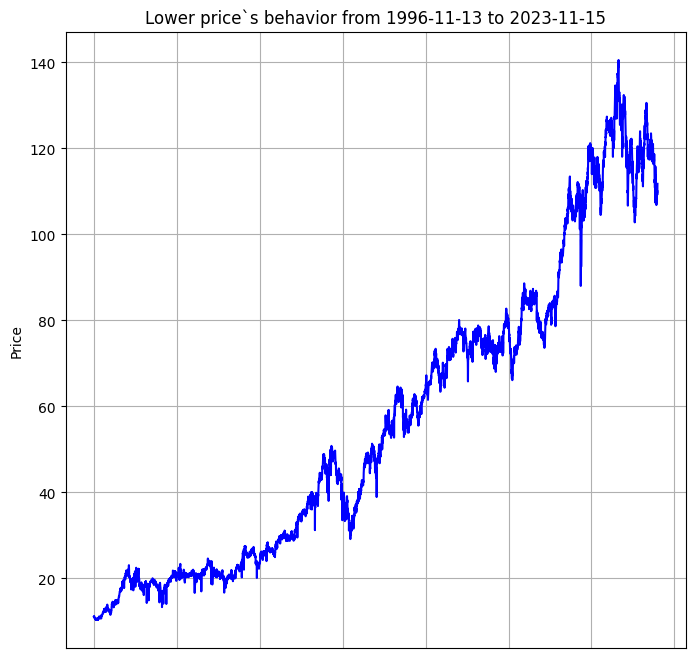

In [ ]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.plot(df_['Low'],color='b')
ax.set_title('Lower price`s behavior from '+start_date+' to '+end_date)
ax.grid()
ax.set_ylabel('Price')
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.show()

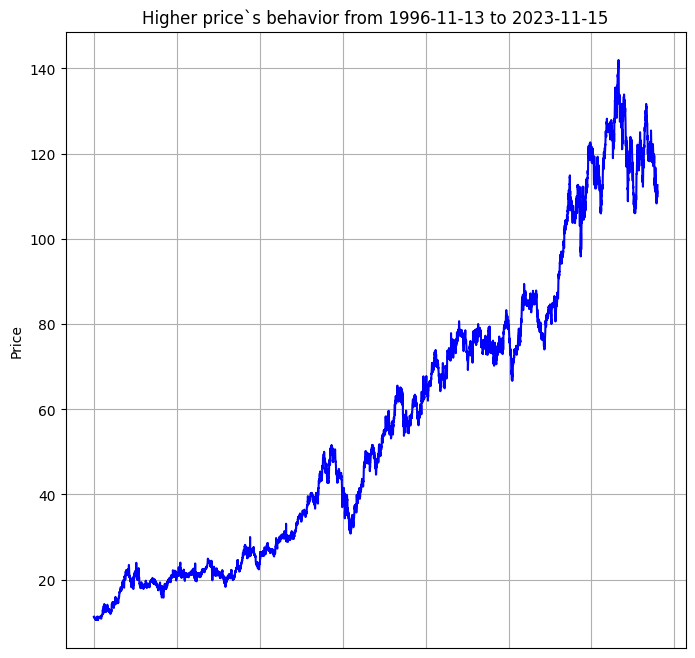

In [ ]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.plot(df_['High'],color='b')
ax.set_title('Higher price`s behavior from '+start_date+' to '+end_date)
ax.grid()
ax.set_ylabel('Price')
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.show()

# **Preparing dataset**

In [ ]:
prices=df_['Low'].values
print(type(prices))
print(prices)

<class 'numpy.ndarray'>
[ 11.05      11.025     11.1      ... 109.209999 110.559998 111.739998]


In [ ]:
pred_wind=30
n_features=1
X=[]
y=[]
for i in range(len(prices)-pred_wind):
    X.append(list(prices[i:pred_wind+i]))
    y.append(prices[pred_wind+i])
X=np.array(X)
X=X.reshape((X.shape[0],pred_wind,1))
y=np.array(y)
X,y=shuffle(X,y,random_state=1)

In [ ]:
print(X[0])
print(y[0])
print(X[1])
print(y[1])

[[47.32    ]
 [47.459999]
 [47.220001]
 [47.48    ]
 [47.52    ]
 [47.200001]
 [47.439999]
 [47.619999]
 [47.860001]
 [48.132   ]
 [48.287998]
 [48.240002]
 [48.34    ]
 [48.040001]
 [48.5     ]
 [48.700001]
 [49.      ]
 [49.012001]
 [49.279999]
 [48.900002]
 [48.919998]
 [48.84    ]
 [49.119999]
 [48.82    ]
 [48.599998]
 [49.459999]
 [49.599998]
 [49.200001]
 [49.400002]
 [49.540001]]
49.700001
[[76.870003]
 [77.110001]
 [77.790001]
 [78.110001]
 [79.      ]
 [78.589996]
 [78.739998]
 [79.160004]
 [78.769997]
 [78.900002]
 [78.629997]
 [78.660004]
 [78.529999]
 [78.720001]
 [79.      ]
 [78.830002]
 [78.300003]
 [78.410004]
 [79.690002]
 [79.510002]
 [79.669998]
 [78.800003]
 [79.300003]
 [79.25    ]
 [78.57    ]
 [79.050003]
 [79.300003]
 [81.349998]
 [81.75    ]
 [81.800003]]
81.650002


In [ ]:
print(X.shape)
print(y.shape)

(6767, 30, 1)
(6767,)


In [ ]:
X,y=shuffle(X,y,random_state=1)
X_train,X_val,y_train,y_val=train_test_split(X,y,train_size=0.8,random_state=1)
print(X_train.shape)
print(X_val.shape)

(5413, 30, 1)
(1354, 30, 1)


In [ ]:
BATCH_SIZE=32
EPOCHS=100
train_data=tf.data.Dataset.from_tensor_slices((tf.convert_to_tensor(X_train),tf.convert_to_tensor(y_train))).batch(BATCH_SIZE)
train_data_sgd=tf.data.Dataset.from_tensor_slices((tf.convert_to_tensor(X_train),tf.convert_to_tensor(y_train))).batch(1)
val_data=tf.data.Dataset.from_tensor_slices((tf.convert_to_tensor(X_val),tf.convert_to_tensor(y_val))).batch(BATCH_SIZE)

# **MSE loss + learning rate 1e-5**

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30)                3840      
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
170/170 [==============================] - 6s 7ms/step - loss: 4498.5454 - val_loss: 4514.6597
Epoch 2/100
170/170 [==============================] - 1s 5ms/step - loss: 4496.2119 - val_loss: 4512.3052
Epoch 3/100
170/170 [==============================] - 1s 5ms/step - loss: 4493.8530 - val_loss: 4509.9277
Epoch 4/100
170/170 [==============================] - 1s 5ms/step - loss: 4491.4766 - val_loss: 

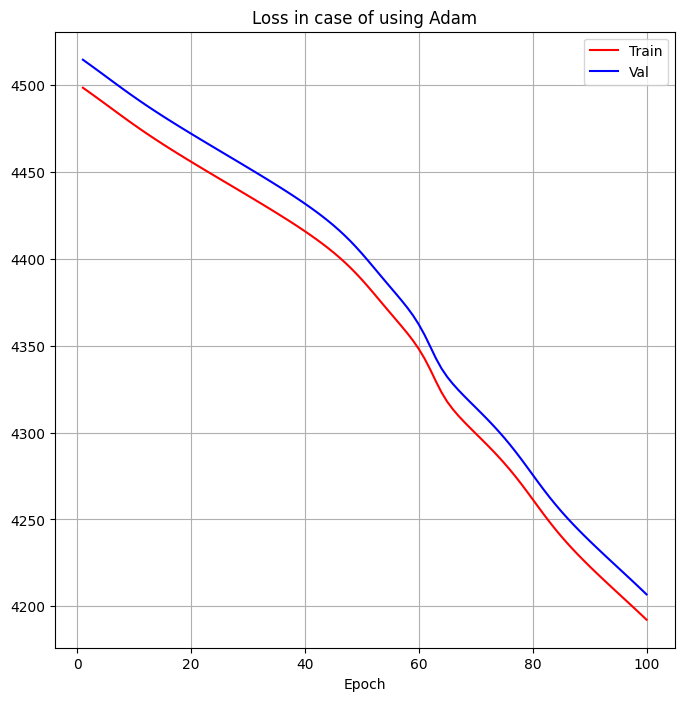

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-0,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),loss=tf.keras.losses.MeanSquaredError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using Adam')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 30)                3840      
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
5413/5413 [==============================] - 23s 4ms/step - loss: 3218.2366 - val_loss: 2353.4907
Epoch 2/100
5413/5413 [==============================] - 20s 4ms/step - loss: 1900.9521 - val_loss: 1573.6034
Epoch 3/100
5413/5413 [==============================] - 21s 4ms/step - loss: 1503.9584 - val_loss: 1522.6051
Epoch 4/100
5413/5413 [==============================] - 20s 4ms/step - loss: 1313.093

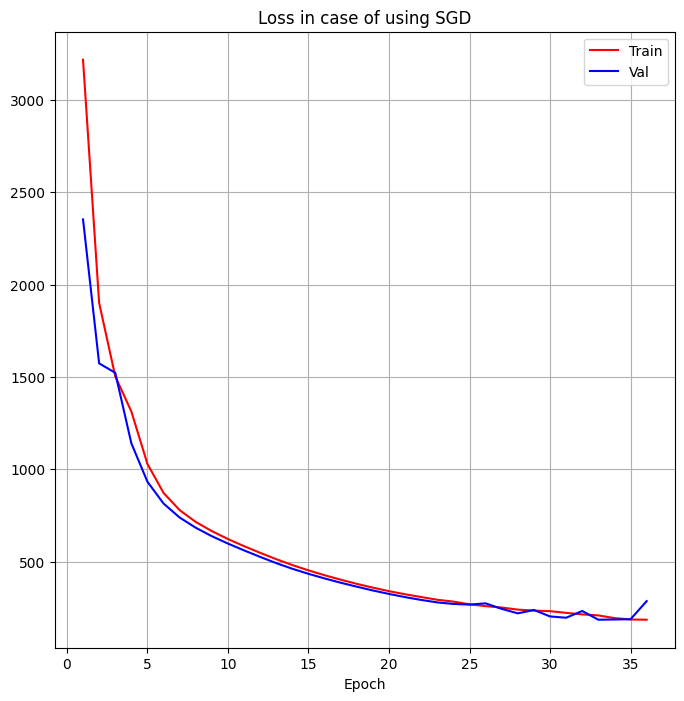

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-0,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-5),loss=tf.keras.losses.MeanSquaredError())
hist=model.fit(train_data_sgd,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using SGD')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30)                3840      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
170/170 [==============================] - 3s 6ms/step - loss: 4393.8867 - val_loss: 4410.7070
Epoch 2/100
170/170 [==============================] - 1s 4ms/step - loss: 4393.7456 - val_loss: 4410.6001
Epoch 3/100
170/170 [==============================] - 1s 4ms/step - loss: 4393.6499 - val_loss: 4410.5176
Epoch 4/100
170/170 [==============================] - 1s 4ms/step - loss: 4393.5767 - val_loss

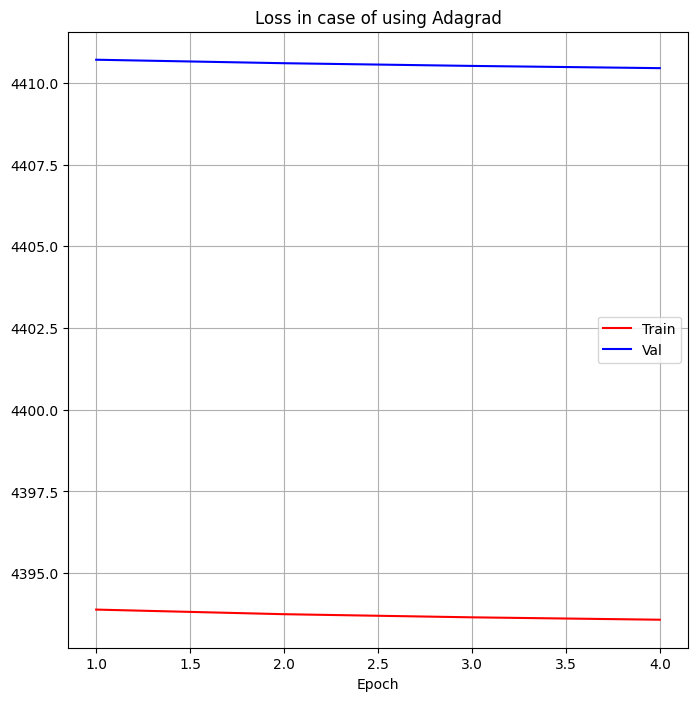

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-0,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-5),loss=tf.keras.losses.MeanSquaredError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using Adagrad')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30)                3840      
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
170/170 [==============================] - 3s 6ms/step - loss: 4423.2168 - val_loss: 4439.8618
Epoch 2/100
170/170 [==============================] - 1s 4ms/step - loss: 4422.4917 - val_loss: 4439.1357
Epoch 3/100
170/170 [==============================] - 1s 4ms/step - loss: 4421.7695 - val_loss: 4438.4116
Epoch 4/100
170/170 [==============================] - 1s 4ms/step - loss: 4421.0479 - val_loss

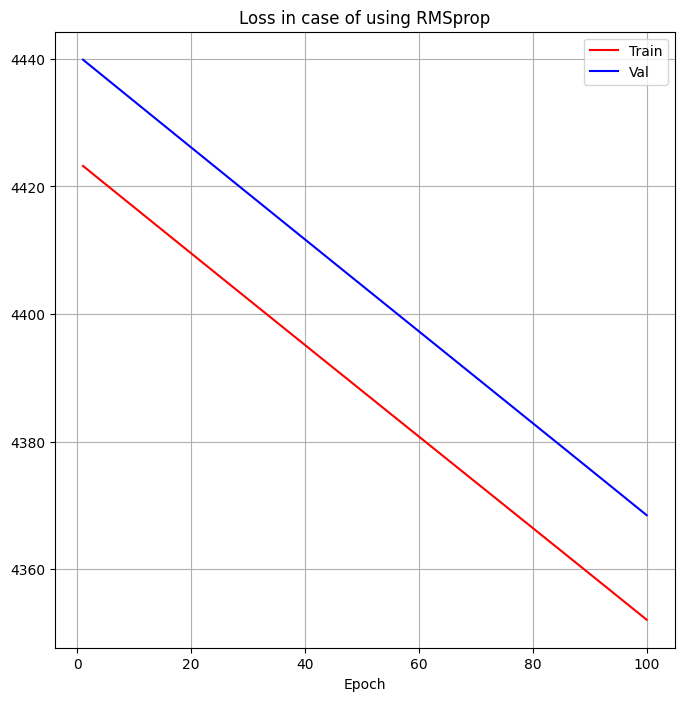

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-0,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-5),loss=tf.keras.losses.MeanSquaredError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using RMSprop')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

# **MAE loss + learning rate 1e-5**

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30)                3840      
                                                                 
 dense_4 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
170/170 [==============================] - 3s 6ms/step - loss: 55.1955 - val_loss: 55.4033
Epoch 2/100
170/170 [==============================] - 1s 4ms/step - loss: 55.1771 - val_loss: 55.3851
Epoch 3/100
170/170 [==============================] - 1s 4ms/step - loss: 55.1590 - val_loss: 55.3671
Epoch 4/100
170/170 [==============================] - 1s 4ms/step - loss: 55.1411 - val_loss: 55.3493


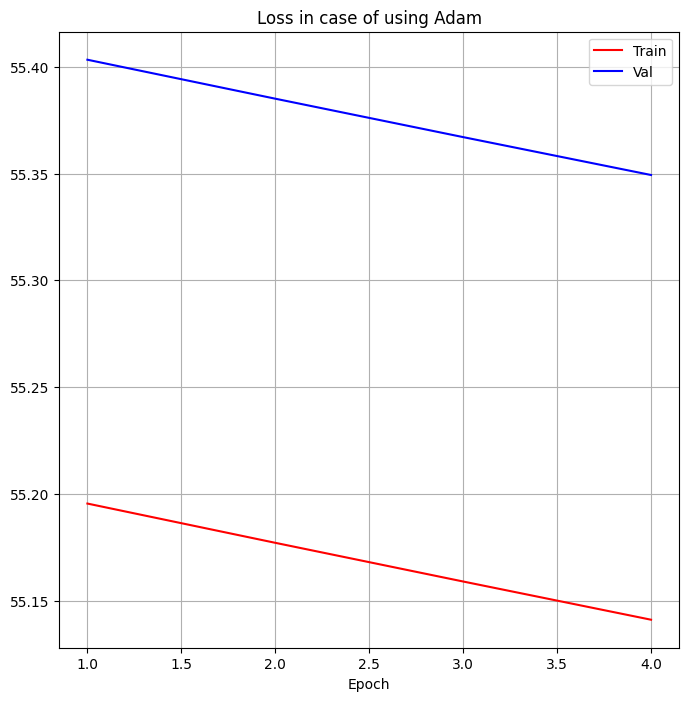

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-1,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),loss=tf.keras.losses.MeanAbsoluteError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using Adam')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 30)                3840      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
5413/5413 [==============================] - 22s 4ms/step - loss: 55.8009 - val_loss: 55.8833
Epoch 2/100
5413/5413 [==============================] - 20s 4ms/step - loss: 55.5315 - val_loss: 55.6140
Epoch 3/100
5413/5413 [==============================] - 21s 4ms/step - loss: 55.2592 - val_loss: 55.3366
Epoch 4/100
5413/5413 [==============================] - 20s 4ms/step - loss: 54.9452 - val_loss: 

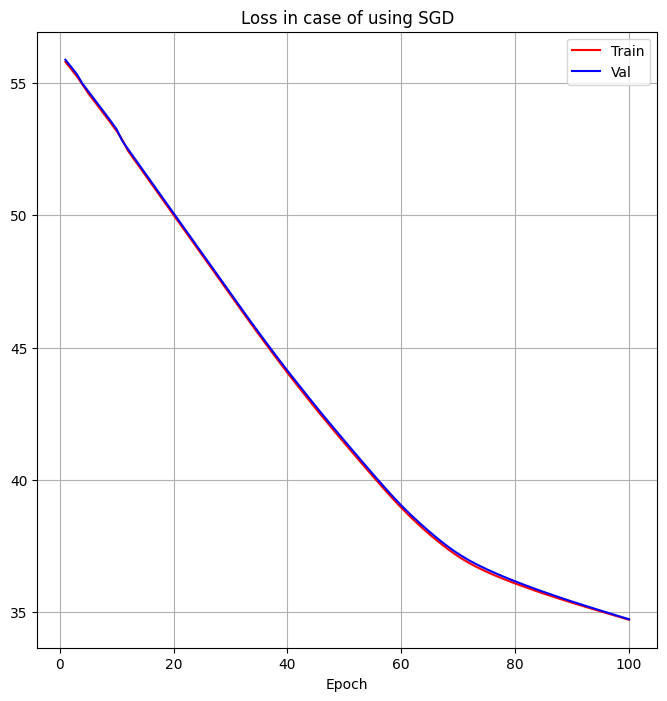

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-1,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-5),loss=tf.keras.losses.MeanAbsoluteError())
hist=model.fit(train_data_sgd,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using SGD')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30)                3840      
                                                                 
 dense_6 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
170/170 [==============================] - 3s 7ms/step - loss: 57.6086 - val_loss: 57.8251
Epoch 2/100
170/170 [==============================] - 1s 4ms/step - loss: 57.6077 - val_loss: 57.8245
Epoch 3/100
170/170 [==============================] - 1s 4ms/step - loss: 57.6071 - val_loss: 57.8240
Epoch 4/100
170/170 [==============================] - 1s 4ms/step - loss: 57.6067 - val_loss: 57.8236


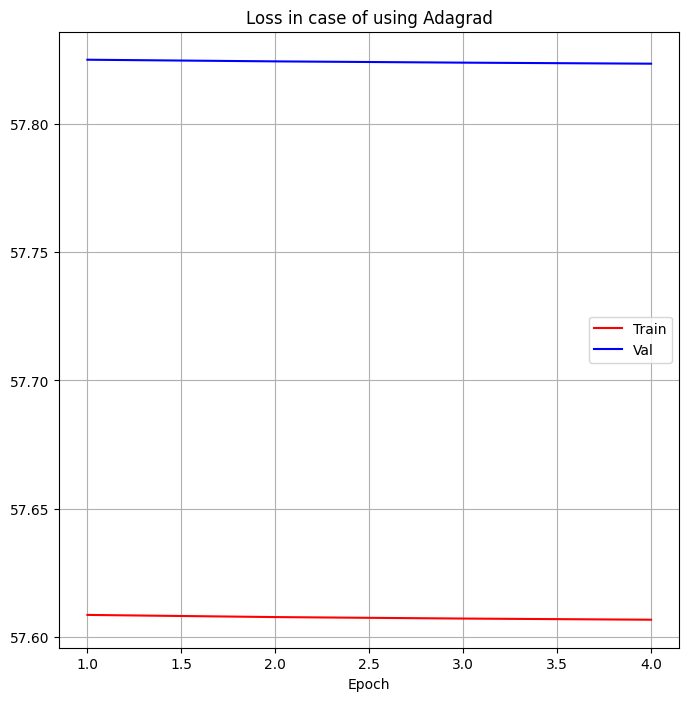

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-1,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-5),loss=tf.keras.losses.MeanAbsoluteError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using Adagrad')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 30)                3840      
                                                                 
 dense_7 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
170/170 [==============================] - 3s 7ms/step - loss: 57.5603 - val_loss: 57.7654
Epoch 2/100
170/170 [==============================] - 1s 4ms/step - loss: 57.5329 - val_loss: 57.7365
Epoch 3/100
170/170 [==============================] - 1s 4ms/step - loss: 57.5020 - val_loss: 57.7029
Epoch 4/100
170/170 [==============================] - 1s 4ms/step - loss: 57.4622 - val_loss: 57.6528
Epoc

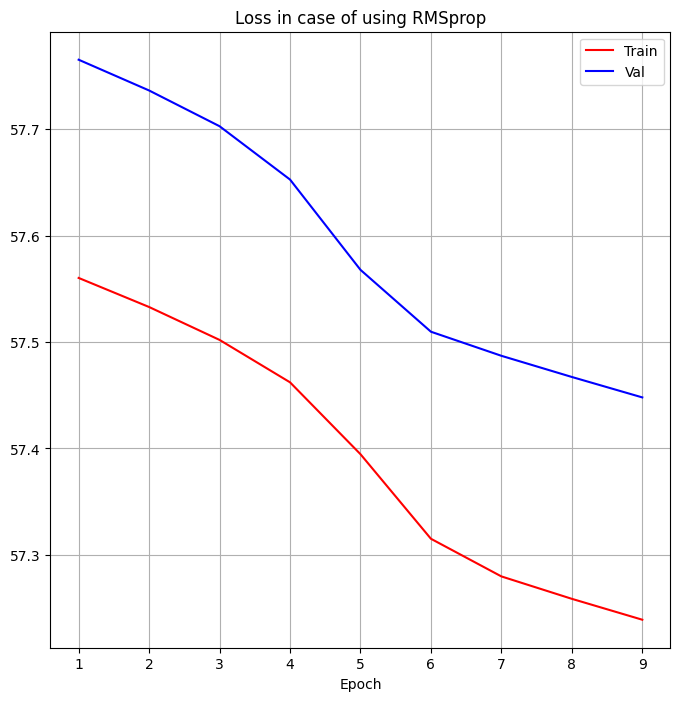

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-1,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-5),loss=tf.keras.losses.MeanAbsoluteError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using RMSprop')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

# **MSE+learning rate 1e-2**

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 30)                3840      
                                                                 
 dense_8 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
170/170 [==============================] - 3s 7ms/step - loss: 2919.7764 - val_loss: 1876.9528
Epoch 2/100
170/170 [==============================] - 1s 5ms/step - loss: 1355.1187 - val_loss: 949.8099
Epoch 3/100
170/170 [==============================] - 1s 4ms/step - loss: 706.3958 - val_loss: 512.7338
Epoch 4/100
170/170 [==============================] - 1s 4ms/step - loss: 396.4604 - val_loss: 30

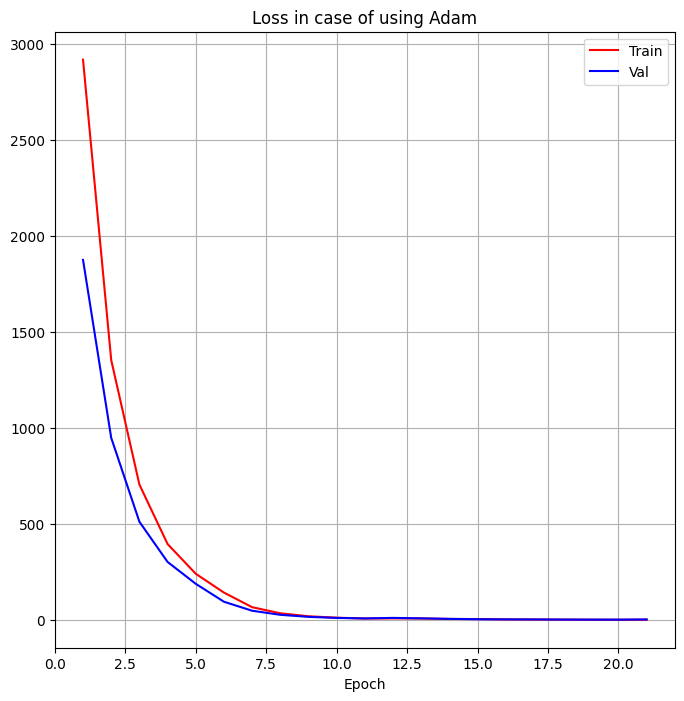

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-0,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),loss=tf.keras.losses.MeanSquaredError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using Adam')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 30)                3840      
                                                                 
 dense_9 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
5413/5413 [==============================] - 23s 4ms/step - loss: 1287.5275 - val_loss: 1565.1100
Epoch 2/100
5413/5413 [==============================] - 21s 4ms/step - loss: 1272.9901 - val_loss: 1565.1093
Epoch 3/100
5413/5413 [==============================] - 21s 4ms/step - loss: 1280.2214 - val_loss: 1650.5183
Epoch 4/100
5413/5413 [==============================] - 21s 4ms/step - loss: 1280.816

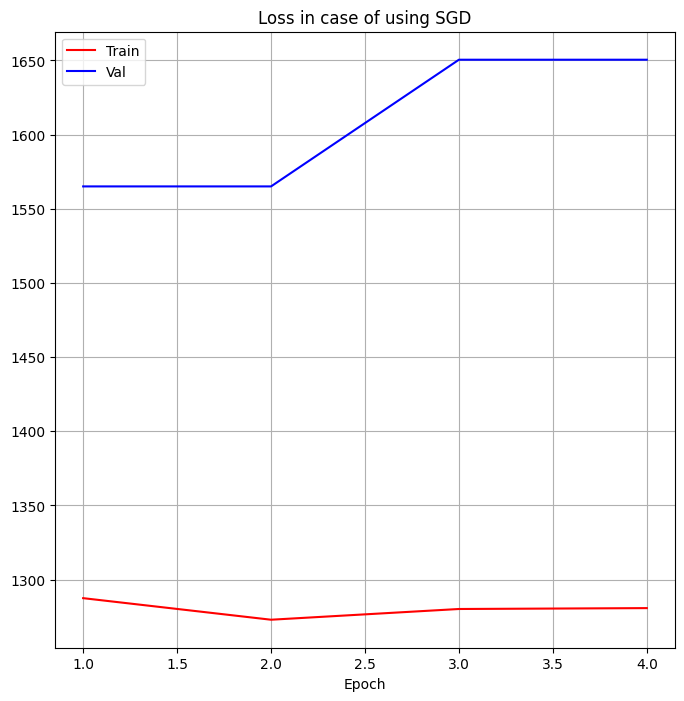

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-0,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-2),loss=tf.keras.losses.MeanSquaredError())
hist=model.fit(train_data_sgd,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using SGD')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 30)                3840      
                                                                 
 dense_10 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
170/170 [==============================] - 3s 7ms/step - loss: 4128.5122 - val_loss: 4023.9294
Epoch 2/100
170/170 [==============================] - 1s 4ms/step - loss: 3939.0837 - val_loss: 3890.8608
Epoch 3/100
170/170 [==============================] - 1s 4ms/step - loss: 3825.6409 - val_loss: 3791.9324
Epoch 4/100
170/170 [==============================] - 1s 4ms/step - loss: 3731.1909 - val_los

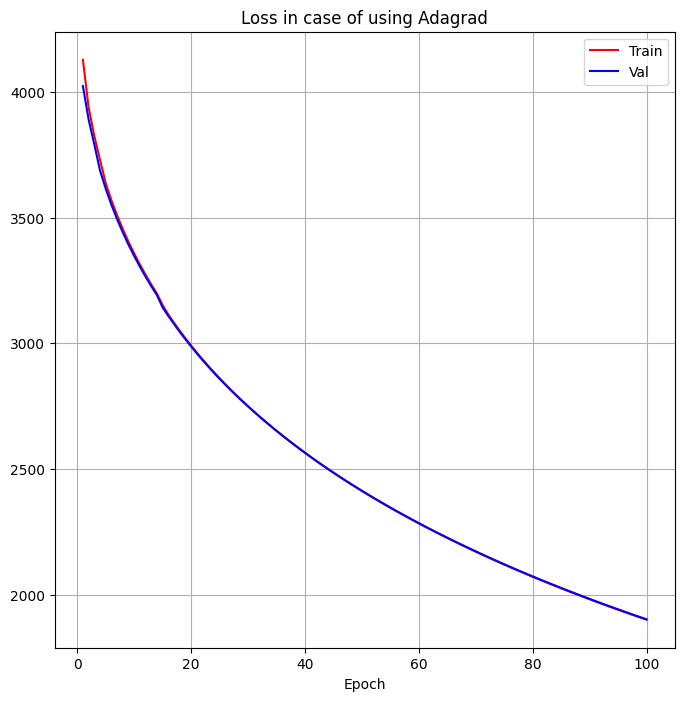

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-0,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-2),loss=tf.keras.losses.MeanSquaredError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using Adagrad')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 30)                3840      
                                                                 
 dense_11 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
170/170 [==============================] - 3s 7ms/step - loss: 3336.5044 - val_loss: 2425.6633
Epoch 2/100
170/170 [==============================] - 1s 5ms/step - loss: 1795.2356 - val_loss: 1217.0007
Epoch 3/100
170/170 [==============================] - 1s 4ms/step - loss: 830.4197 - val_loss: 488.7556
Epoch 4/100
170/170 [==============================] - 1s 4ms/step - loss: 309.7808 - val_loss: 

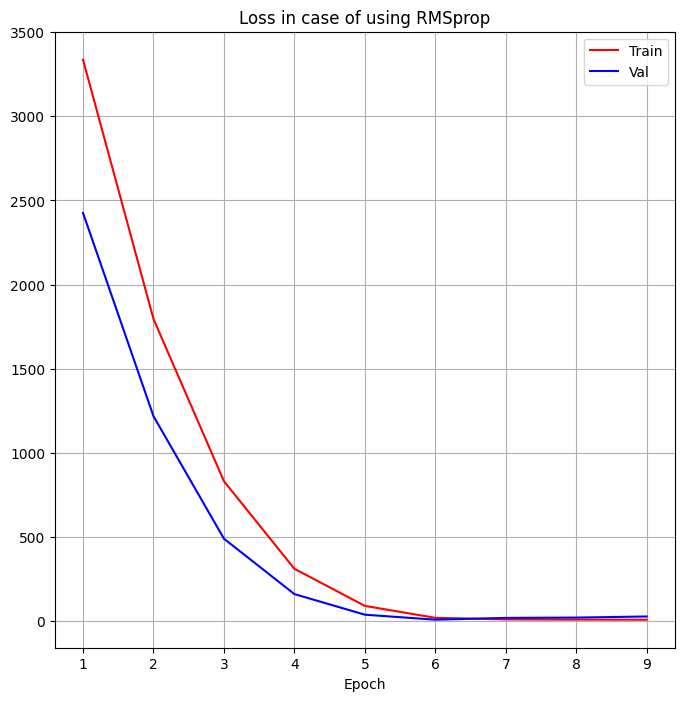

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-0,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-2),loss=tf.keras.losses.MeanSquaredError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using RMSprop')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

# **MAE+learning rate 1e-2**

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 30)                3840      
                                                                 
 dense_12 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
170/170 [==============================] - 3s 7ms/step - loss: 49.2554 - val_loss: 39.5589
Epoch 2/100
170/170 [==============================] - 1s 5ms/step - loss: 32.4174 - val_loss: 27.0811
Epoch 3/100
170/170 [==============================] - 1s 5ms/step - loss: 22.9027 - val_loss: 19.3067
Epoch 4/100
170/170 [==============================] - 1s 5ms/step - loss: 16.2386 - val_loss: 13.7310
Epo

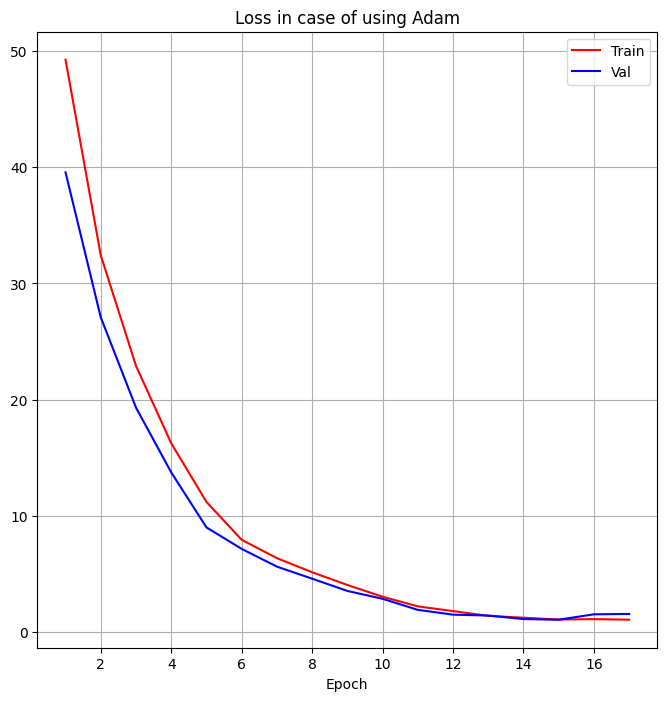

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-1,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),loss=tf.keras.losses.MeanAbsoluteError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using Adam')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 30)                3840      
                                                                 
 dense_13 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
5413/5413 [==============================] - 24s 4ms/step - loss: 31.5965 - val_loss: 29.8303
Epoch 2/100
5413/5413 [==============================] - 22s 4ms/step - loss: 29.8874 - val_loss: 29.8324
Epoch 3/100
5413/5413 [==============================] - 21s 4ms/step - loss: 29.7916 - val_loss: 29.8236
Epoch 4/100
5413/5413 [==============================] - 22s 4ms/step - loss: 29.8728 - val_loss:

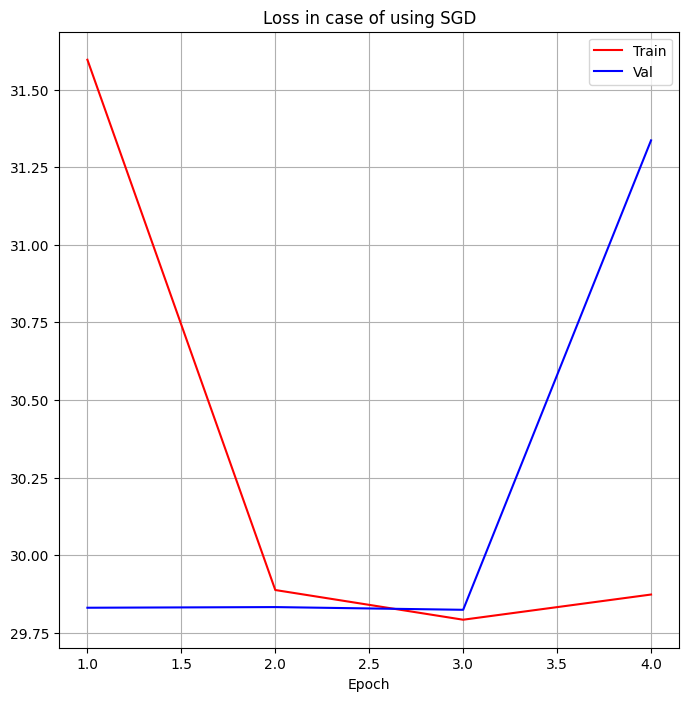

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-1,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-2),loss=tf.keras.losses.MeanAbsoluteError())
hist=model.fit(train_data_sgd,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using SGD')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 30)                3840      
                                                                 
 dense_14 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
170/170 [==============================] - 4s 7ms/step - loss: 54.3002 - val_loss: 53.5482
Epoch 2/100
170/170 [==============================] - 1s 4ms/step - loss: 52.7350 - val_loss: 52.4093
Epoch 3/100
170/170 [==============================] - 1s 4ms/step - loss: 51.7452 - val_loss: 51.5356
Epoch 4/100
170/170 [==============================] - 1s 5ms/step - loss: 50.9453 - val_loss: 50.7992
Epo

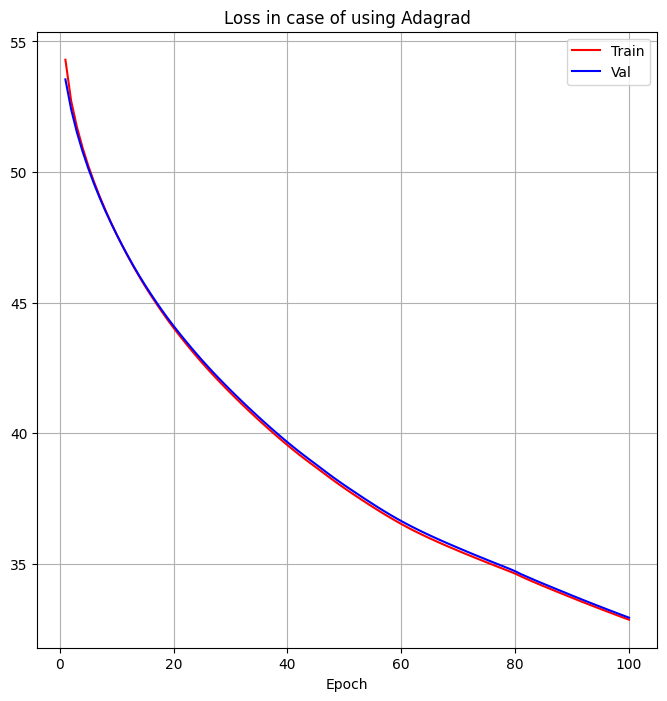

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-1,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-2),loss=tf.keras.losses.MeanAbsoluteError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using Adagrad')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 30)                3840      
                                                                 
 dense_15 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
170/170 [==============================] - 3s 7ms/step - loss: 42.7544 - val_loss: 32.7388
Epoch 2/100
170/170 [==============================] - 1s 5ms/step - loss: 25.8540 - val_loss: 19.8291
Epoch 3/100
170/170 [==============================] - 1s 5ms/step - loss: 15.3880 - val_loss: 11.2294
Epoch 4/100
170/170 [==============================] - 1s 5ms/step - loss: 9.0954 - val_loss: 7.5601
Epoch

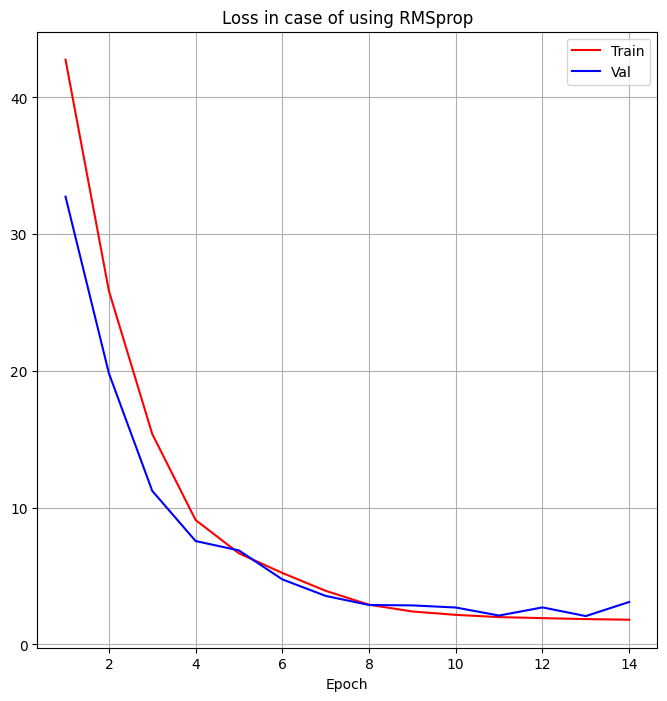

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-1,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-2),loss=tf.keras.losses.MeanAbsoluteError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using RMSprop')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

# **MSE+learning rate 1e-1**

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 30)                3840      
                                                                 
 dense_16 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
170/170 [==============================] - 3s 7ms/step - loss: 1083.5232 - val_loss: 130.8624
Epoch 2/100
170/170 [==============================] - 1s 5ms/step - loss: 200.8772 - val_loss: 37.9957
Epoch 3/100
170/170 [==============================] - 1s 5ms/step - loss: 31.3387 - val_loss: 18.6260
Epoch 4/100
170/170 [==============================] - 1s 5ms/step - loss: 11.8294 - val_loss: 8.5063


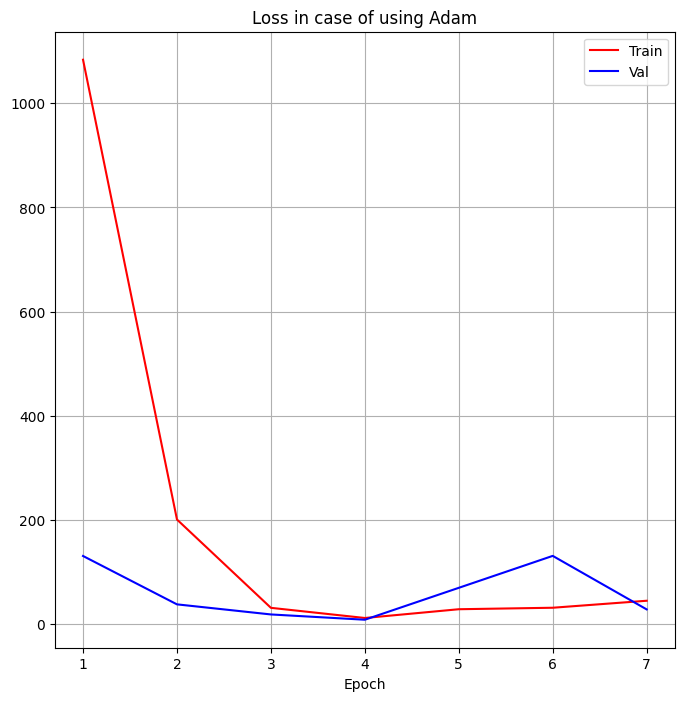

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-0,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-1),loss=tf.keras.losses.MeanSquaredError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using Adam')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 30)                3840      
                                                                 
 dense_17 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
5413/5413 [==============================] - 24s 4ms/step - loss: 2171.8425 - val_loss: 6351.9336
Epoch 2/100
5413/5413 [==============================] - 21s 4ms/step - loss: 1912.0211 - val_loss: 6709.5229
Epoch 3/100
5413/5413 [==============================] - 22s 4ms/step - loss: 2085.9788 - val_loss: 6709.5264
Epoch 4/100
5413/5413 [==============================] - 22s 4ms/step - loss: 2086.07

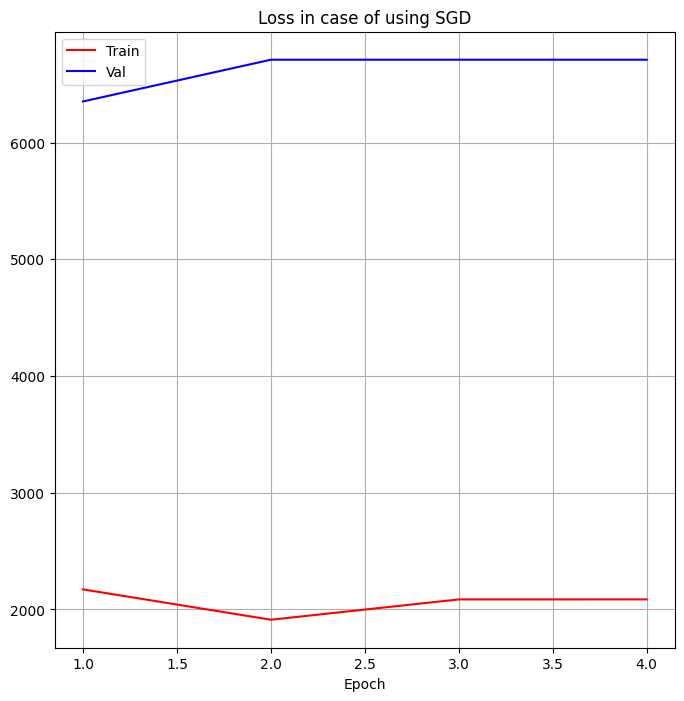

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-0,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1),loss=tf.keras.losses.MeanSquaredError())
hist=model.fit(train_data_sgd,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using SGD')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 30)                3840      
                                                                 
 dense_18 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
170/170 [==============================] - 3s 7ms/step - loss: 3293.4165 - val_loss: 2795.4858
Epoch 2/100
170/170 [==============================] - 1s 5ms/step - loss: 2532.2625 - val_loss: 2307.4243
Epoch 3/100
170/170 [==============================] - 1s 5ms/step - loss: 2136.0642 - val_loss: 1990.5157
Epoch 4/100
170/170 [==============================] - 1s 5ms/step - loss: 1821.8600 - val_los

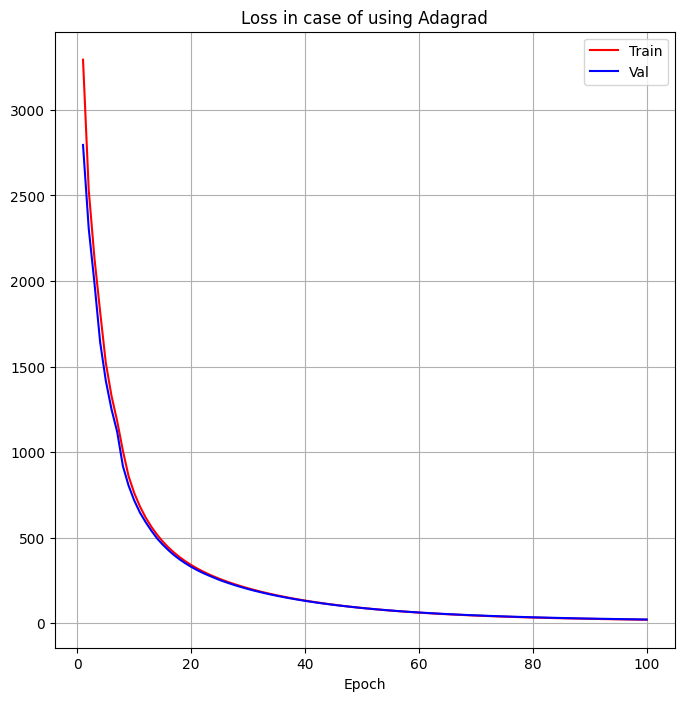

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-0,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-1),loss=tf.keras.losses.MeanSquaredError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using Adagrad')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 30)                3840      
                                                                 
 dense_19 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
170/170 [==============================] - 3s 7ms/step - loss: 922.5875 - val_loss: 202.8059
Epoch 2/100
170/170 [==============================] - 1s 5ms/step - loss: 184.9032 - val_loss: 165.6471
Epoch 3/100
170/170 [==============================] - 1s 5ms/step - loss: 155.4166 - val_loss: 89.3397
Epoch 4/100
170/170 [==============================] - 1s 5ms/step - loss: 144.4909 - val_loss: 812.1

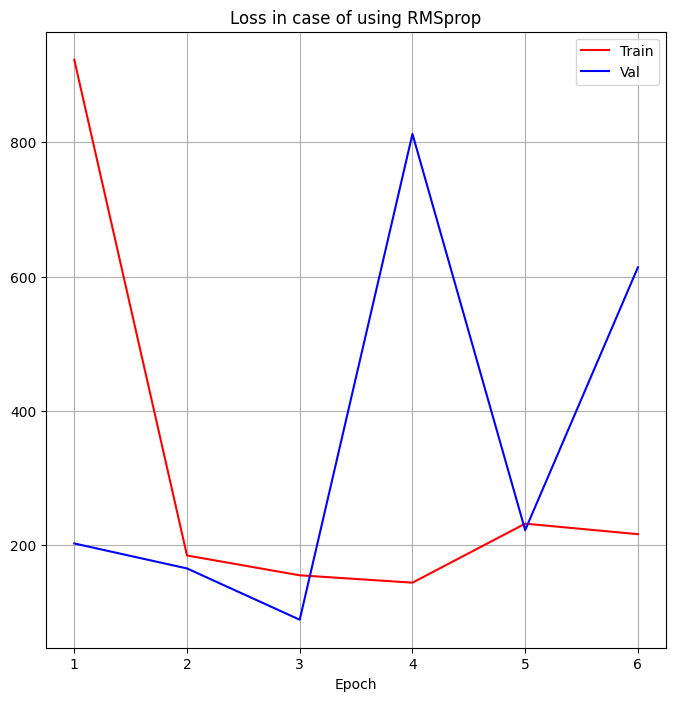

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-0,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-1),loss=tf.keras.losses.MeanSquaredError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using RMSprop')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

# **MAE+learning rate 1e-1**

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 30)                3840      
                                                                 
 dense_20 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
170/170 [==============================] - 3s 7ms/step - loss: 28.8000 - val_loss: 18.9870
Epoch 2/100
170/170 [==============================] - 1s 5ms/step - loss: 15.1133 - val_loss: 11.5835
Epoch 3/100
170/170 [==============================] - 1s 5ms/step - loss: 9.4592 - val_loss: 7.4598
Epoch 4/100
170/170 [==============================] - 1s 5ms/step - loss: 6.4700 - val_loss: 4.9836
Epoch 5

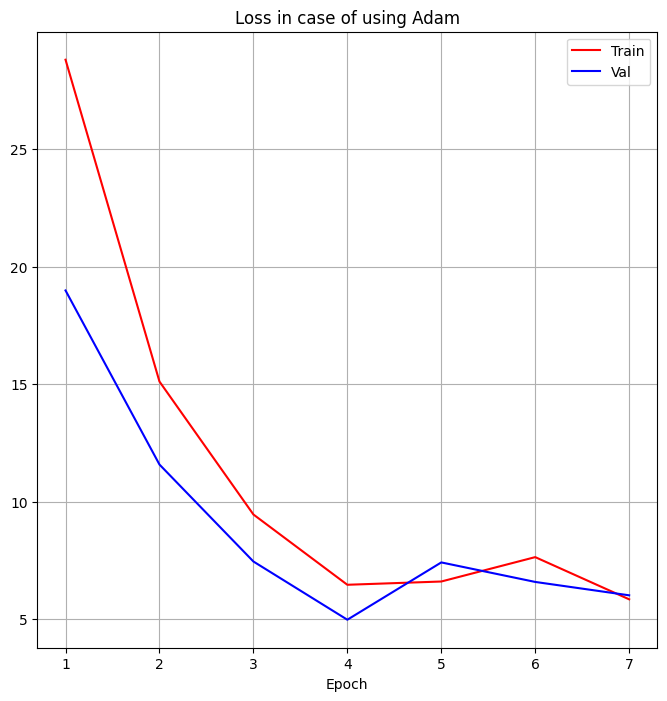

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-1,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-1),loss=tf.keras.losses.MeanAbsoluteError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using Adam')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 30)                3840      
                                                                 
 dense_21 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
5413/5413 [==============================] - 24s 4ms/step - loss: 30.1752 - val_loss: 29.7823
Epoch 2/100
5413/5413 [==============================] - 21s 4ms/step - loss: 29.8742 - val_loss: 29.7819
Epoch 3/100
5413/5413 [==============================] - 21s 4ms/step - loss: 29.8755 - val_loss: 29.7739
Epoch 4/100
5413/5413 [==============================] - 21s 4ms/step - loss: 29.8708 - val_loss:

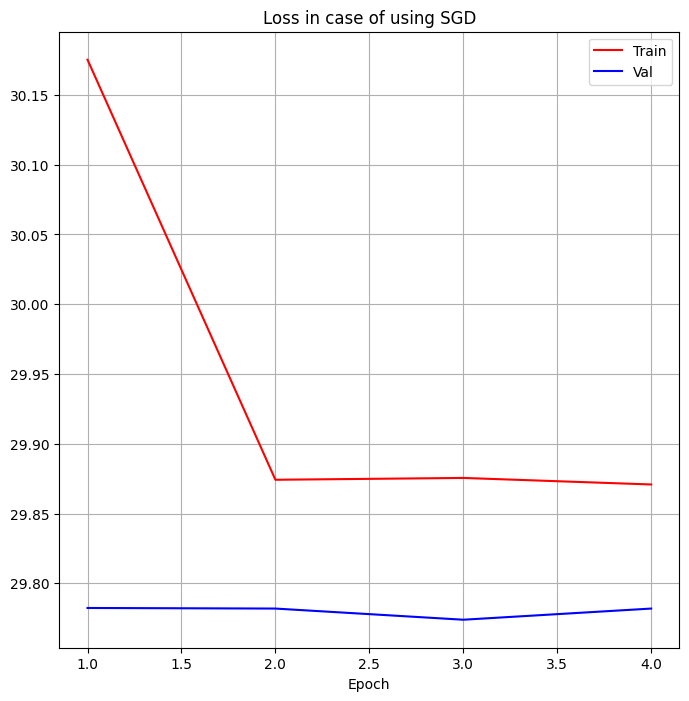

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-1,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1),loss=tf.keras.losses.MeanAbsoluteError())
hist=model.fit(train_data_sgd,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using SGD')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 30)                3840      
                                                                 
 dense_22 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
170/170 [==============================] - 3s 7ms/step - loss: 40.8725 - val_loss: 34.8118
Epoch 2/100
170/170 [==============================] - 1s 4ms/step - loss: 31.0365 - val_loss: 28.3733
Epoch 3/100
170/170 [==============================] - 1s 4ms/step - loss: 26.4133 - val_loss: 24.7697
Epoch 4/100
170/170 [==============================] - 1s 4ms/step - loss: 23.1374 - val_loss: 21.9220
Epo

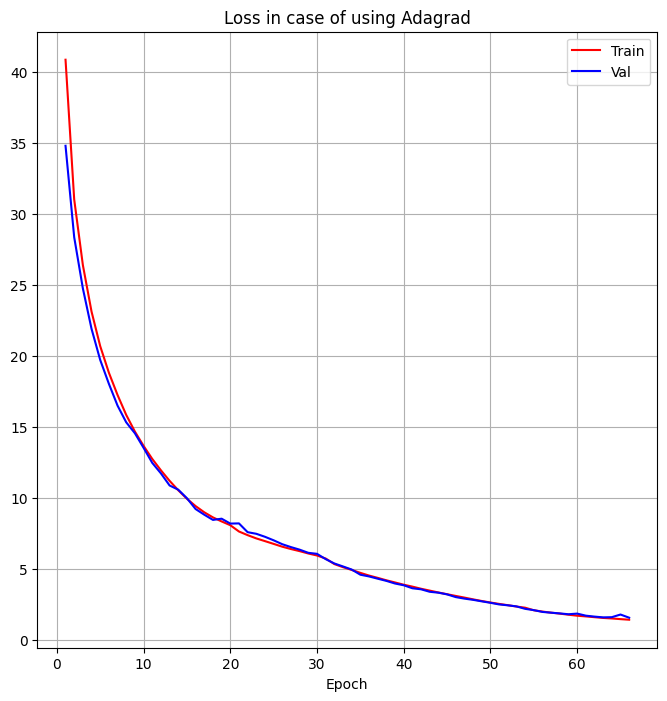

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-1,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-1),loss=tf.keras.losses.MeanAbsoluteError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using Adagrad')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_23 (LSTM)              (None, 30)                3840      
                                                                 
 dense_23 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
170/170 [==============================] - 4s 7ms/step - loss: 27.0569 - val_loss: 18.6627
Epoch 2/100
170/170 [==============================] - 1s 5ms/step - loss: 12.7267 - val_loss: 16.1536
Epoch 3/100
170/170 [==============================] - 1s 4ms/step - loss: 8.6691 - val_loss: 10.1868
Epoch 4/100
170/170 [==============================] - 1s 4ms/step - loss: 5.9429 - val_loss: 6.4804
Epoch 

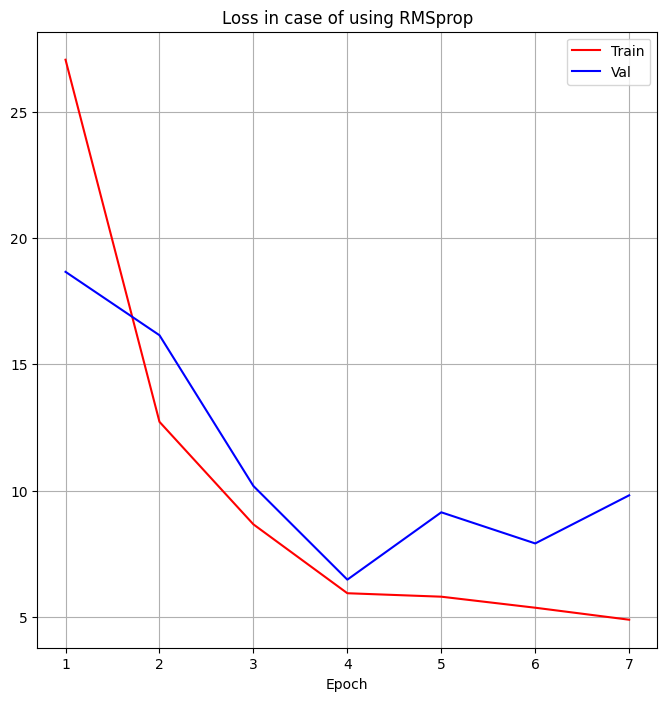

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-1,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-1),loss=tf.keras.losses.MeanAbsoluteError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using RMSprop')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

# **MSE+learning rate 1e-4**

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 30)                3840      
                                                                 
 dense_24 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
170/170 [==============================] - 3s 7ms/step - loss: 4409.0156 - val_loss: 4417.7856
Epoch 2/100
170/170 [==============================] - 1s 4ms/step - loss: 4392.2969 - val_loss: 4400.0015
Epoch 3/100
170/170 [==============================] - 1s 5ms/step - loss: 4368.9976 - val_loss: 4359.3066
Epoch 4/100
170/170 [==============================] - 1s 4ms/step - loss: 4312.1094 - val_los

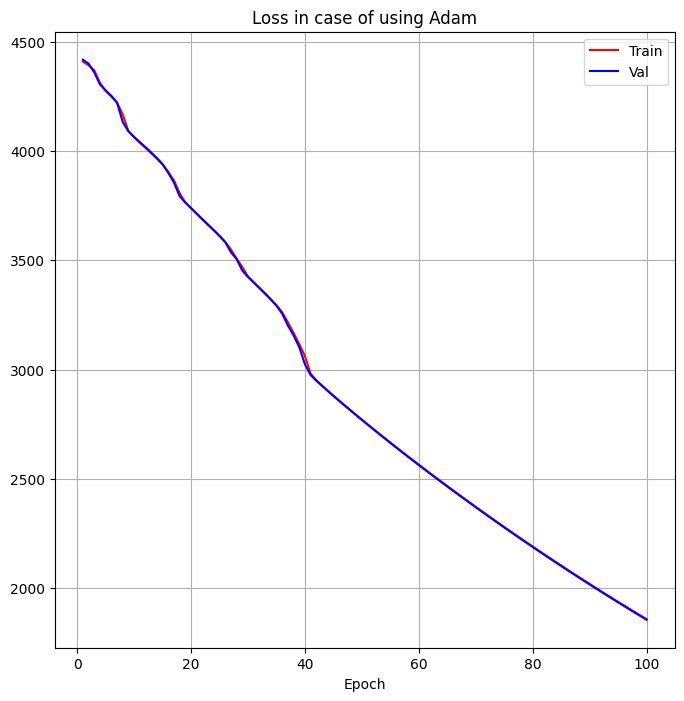

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-0,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),loss=tf.keras.losses.MeanSquaredError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using Adam')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_25 (LSTM)              (None, 30)                3840      
                                                                 
 dense_25 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
5413/5413 [==============================] - 23s 4ms/step - loss: 1399.0469 - val_loss: 1203.5842
Epoch 2/100
5413/5413 [==============================] - 21s 4ms/step - loss: 1212.3062 - val_loss: 1203.1930
Epoch 3/100
5413/5413 [==============================] - 21s 4ms/step - loss: 1208.6533 - val_loss: 1202.1580
Epoch 4/100
5413/5413 [==============================] - 21s 4ms/step - loss: 1222.50

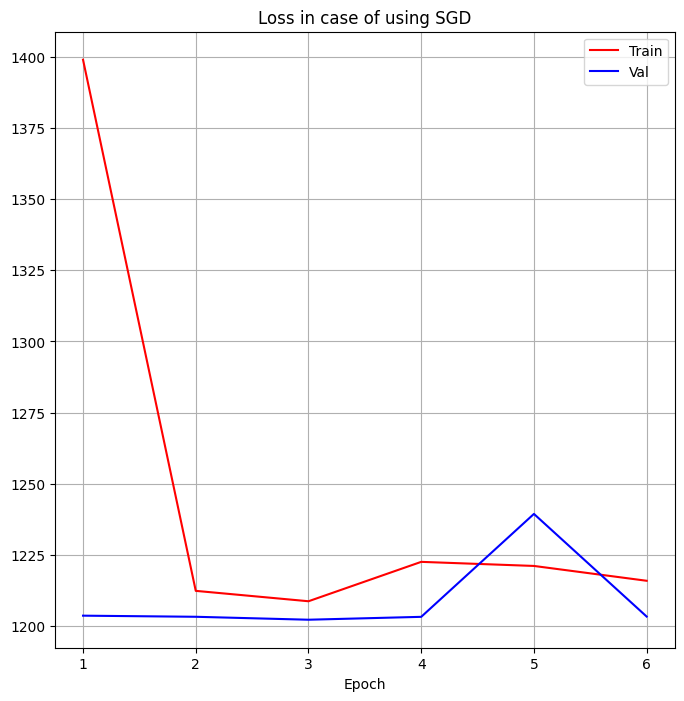

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-0,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-4),loss=tf.keras.losses.MeanSquaredError())
hist=model.fit(train_data_sgd,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using SGD')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 30)                3840      
                                                                 
 dense_26 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
170/170 [==============================] - 3s 7ms/step - loss: 4346.1108 - val_loss: 4362.3818
Epoch 2/100
170/170 [==============================] - 1s 4ms/step - loss: 4345.3472 - val_loss: 4361.8052
Epoch 3/100
170/170 [==============================] - 1s 4ms/step - loss: 4344.8481 - val_loss: 4361.3618
Epoch 4/100
170/170 [==============================] - 1s 4ms/step - loss: 4344.4409 - val_los

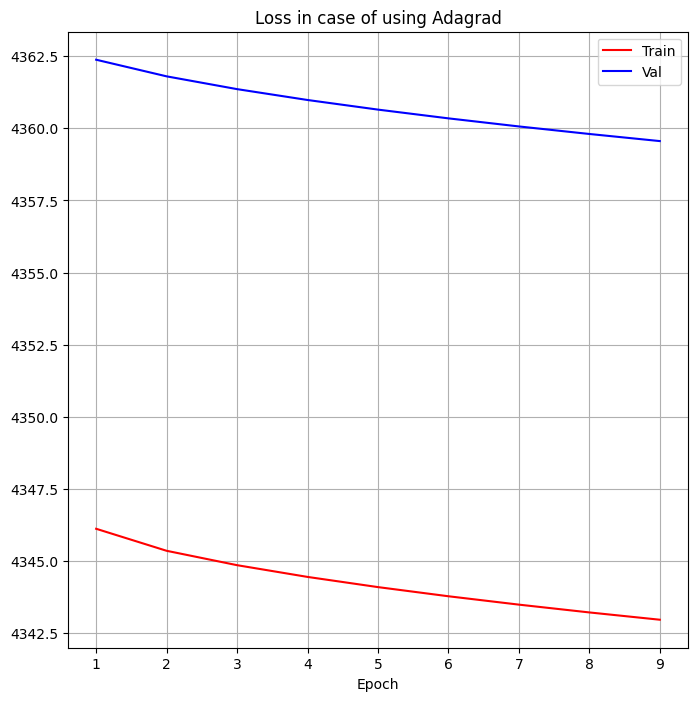

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-0,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-4),loss=tf.keras.losses.MeanSquaredError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using Adagrad')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 30)                3840      
                                                                 
 dense_27 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
170/170 [==============================] - 3s 7ms/step - loss: 4406.7339 - val_loss: 4412.6602
Epoch 2/100
170/170 [==============================] - 1s 5ms/step - loss: 4384.6558 - val_loss: 4390.1460
Epoch 3/100
170/170 [==============================] - 1s 4ms/step - loss: 4363.5054 - val_loss: 4370.4932
Epoch 4/100
170/170 [==============================] - 1s 4ms/step - loss: 4345.2075 - val_los

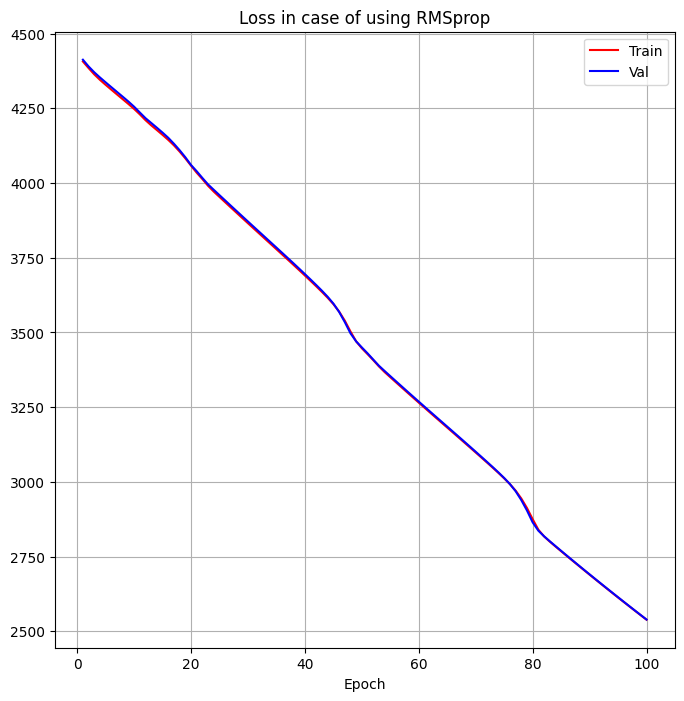

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-0,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),loss=tf.keras.losses.MeanSquaredError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using RMSprop')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

# **MAE+learning rate 1e-4**

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 30)                3840      
                                                                 
 dense_28 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
170/170 [==============================] - 3s 7ms/step - loss: 56.8521 - val_loss: 56.9914
Epoch 2/100
170/170 [==============================] - 1s 5ms/step - loss: 56.6907 - val_loss: 56.8285
Epoch 3/100
170/170 [==============================] - 1s 5ms/step - loss: 56.5483 - val_loss: 56.7056
Epoch 4/100
170/170 [==============================] - 1s 4ms/step - loss: 56.4339 - val_loss: 56.5961
Epo

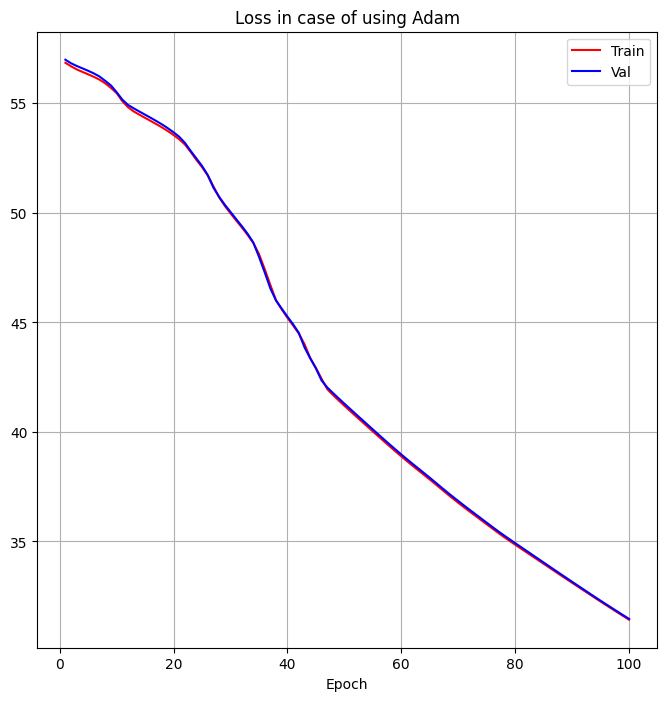

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-1,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),loss=tf.keras.losses.MeanAbsoluteError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using Adam')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_29 (LSTM)              (None, 30)                3840      
                                                                 
 dense_29 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
5413/5413 [==============================] - 23s 4ms/step - loss: 54.3280 - val_loss: 52.8613
Epoch 2/100
5413/5413 [==============================] - 21s 4ms/step - loss: 51.0195 - val_loss: 49.6117
Epoch 3/100
5413/5413 [==============================] - 21s 4ms/step - loss: 47.7706 - val_loss: 46.3632
Epoch 4/100
5413/5413 [==============================] - 21s 4ms/step - loss: 44.5882 - val_loss:

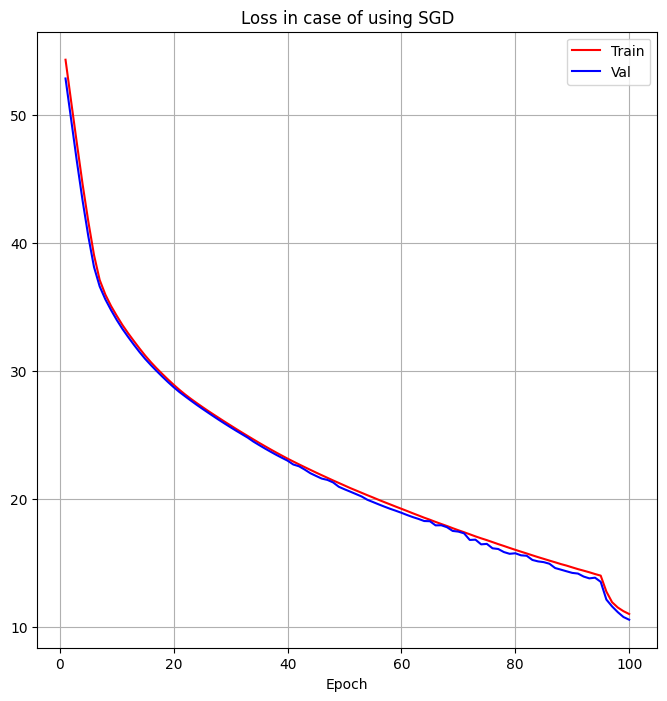

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-1,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-4),loss=tf.keras.losses.MeanAbsoluteError())
hist=model.fit(train_data_sgd,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using SGD')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 30)                3840      
                                                                 
 dense_30 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
170/170 [==============================] - 3s 6ms/step - loss: 57.3808 - val_loss: 57.5905
Epoch 2/100
170/170 [==============================] - 1s 4ms/step - loss: 57.3689 - val_loss: 57.5816
Epoch 3/100
170/170 [==============================] - 1s 4ms/step - loss: 57.3612 - val_loss: 57.5747
Epoch 4/100
170/170 [==============================] - 1s 4ms/step - loss: 57.3549 - val_loss: 57.5690


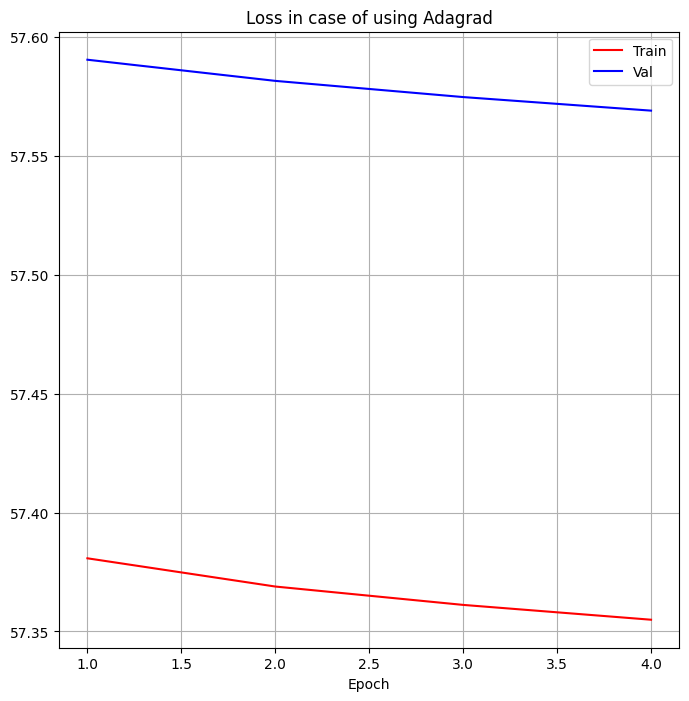

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-1,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-4),loss=tf.keras.losses.MeanAbsoluteError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using Adagrad')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_31 (LSTM)              (None, 30)                3840      
                                                                 
 dense_31 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
170/170 [==============================] - 3s 10ms/step - loss: 55.6451 - val_loss: 55.7591
Epoch 2/100
170/170 [==============================] - 1s 4ms/step - loss: 55.4432 - val_loss: 55.5604
Epoch 3/100
170/170 [==============================] - 1s 4ms/step - loss: 55.2447 - val_loss: 55.3617
Epoch 4/100
170/170 [==============================] - 1s 4ms/step - loss: 55.0439 - val_loss: 55.1578
Ep

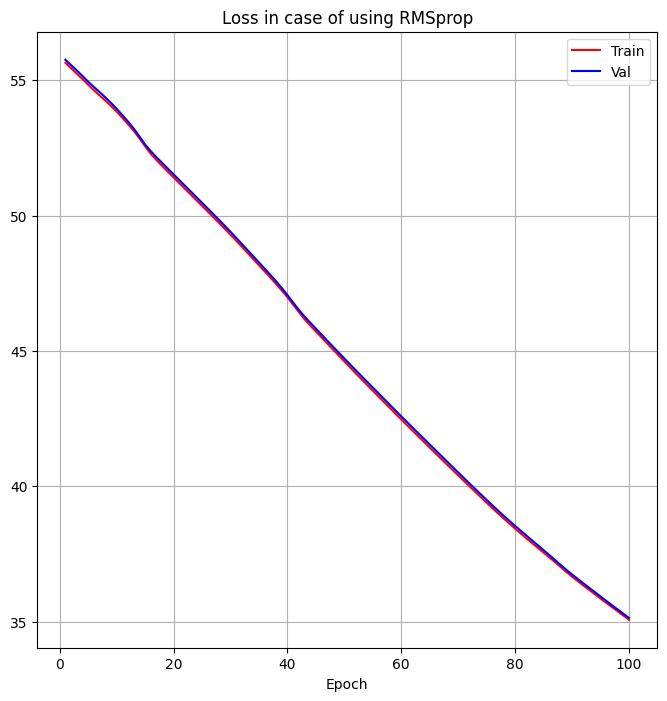

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-1,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),loss=tf.keras.losses.MeanAbsoluteError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using RMSprop')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

# **MSE+learning rate 1e-3**

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 30)                3840      
                                                                 
 dense_32 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
170/170 [==============================] - 3s 7ms/step - loss: 4389.2144 - val_loss: 4223.5933
Epoch 2/100
170/170 [==============================] - 1s 4ms/step - loss: 3970.4287 - val_loss: 3607.1204
Epoch 3/100
170/170 [==============================] - 1s 4ms/step - loss: 3291.0933 - val_loss: 2989.7764
Epoch 4/100
170/170 [==============================] - 1s 4ms/step - loss: 2794.2341 - val_los

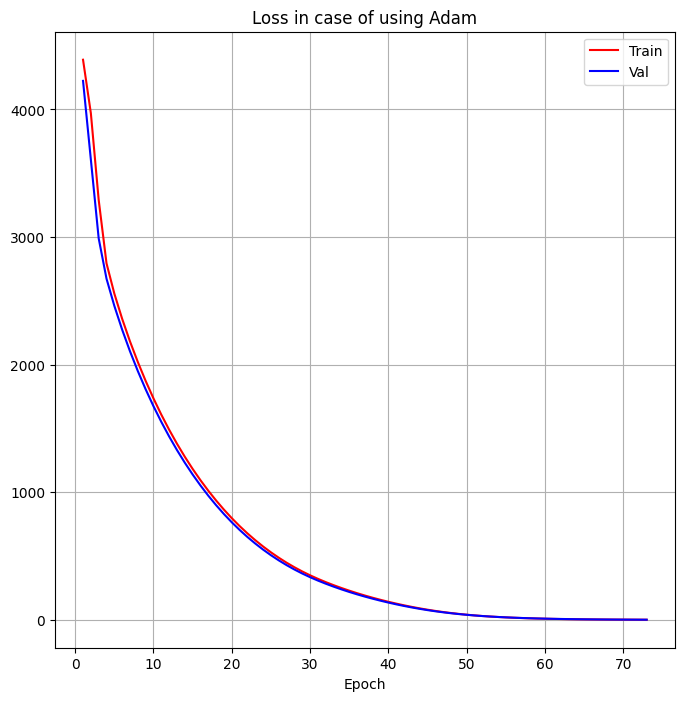

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-0,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss=tf.keras.losses.MeanSquaredError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using Adam')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_33 (LSTM)              (None, 30)                3840      
                                                                 
 dense_33 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
5413/5413 [==============================] - 23s 4ms/step - loss: 1243.0316 - val_loss: 1202.9760
Epoch 2/100
5413/5413 [==============================] - 21s 4ms/step - loss: 1214.8384 - val_loss: 1202.9697
Epoch 3/100
5413/5413 [==============================] - 21s 4ms/step - loss: 1214.8351 - val_loss: 1202.9672
Epoch 4/100
5413/5413 [==============================] - 21s 4ms/step - loss: 1214.82

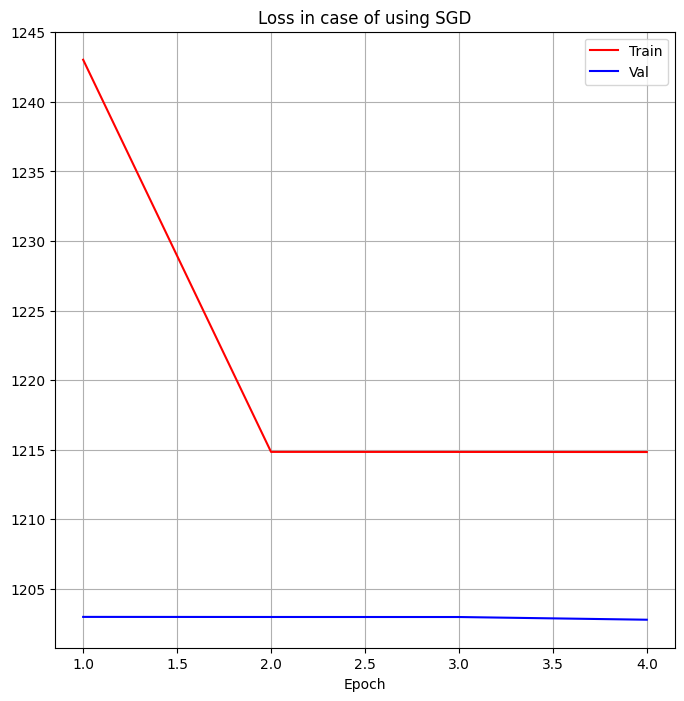

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-0,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),loss=tf.keras.losses.MeanSquaredError())
hist=model.fit(train_data_sgd,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using SGD')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_34 (LSTM)              (None, 30)                3840      
                                                                 
 dense_34 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
170/170 [==============================] - 3s 7ms/step - loss: 4476.8179 - val_loss: 4481.4238
Epoch 2/100
170/170 [==============================] - 1s 4ms/step - loss: 4455.8887 - val_loss: 4465.7866
Epoch 3/100
170/170 [==============================] - 1s 4ms/step - loss: 4442.1968 - val_loss: 4452.6616
Epoch 4/100
170/170 [==============================] - 1s 4ms/step - loss: 4430.1582 - val_los

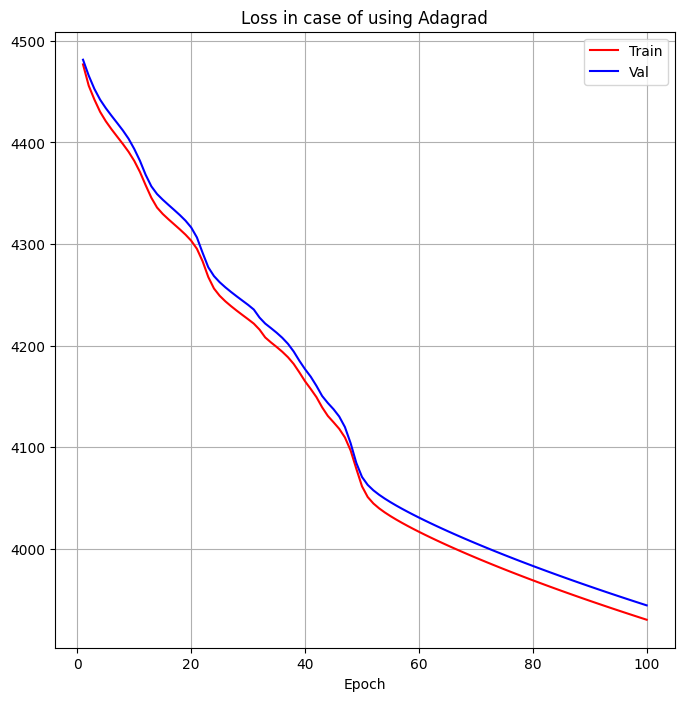

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-0,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-3),loss=tf.keras.losses.MeanSquaredError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using Adagrad')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_35 (LSTM)              (None, 30)                3840      
                                                                 
 dense_35 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
170/170 [==============================] - 3s 7ms/step - loss: 4230.2808 - val_loss: 4122.4966
Epoch 2/100
170/170 [==============================] - 1s 4ms/step - loss: 4020.8967 - val_loss: 3944.4187
Epoch 3/100
170/170 [==============================] - 1s 4ms/step - loss: 3796.2468 - val_loss: 3673.7781
Epoch 4/100
170/170 [==============================] - 1s 4ms/step - loss: 3550.7903 - val_los

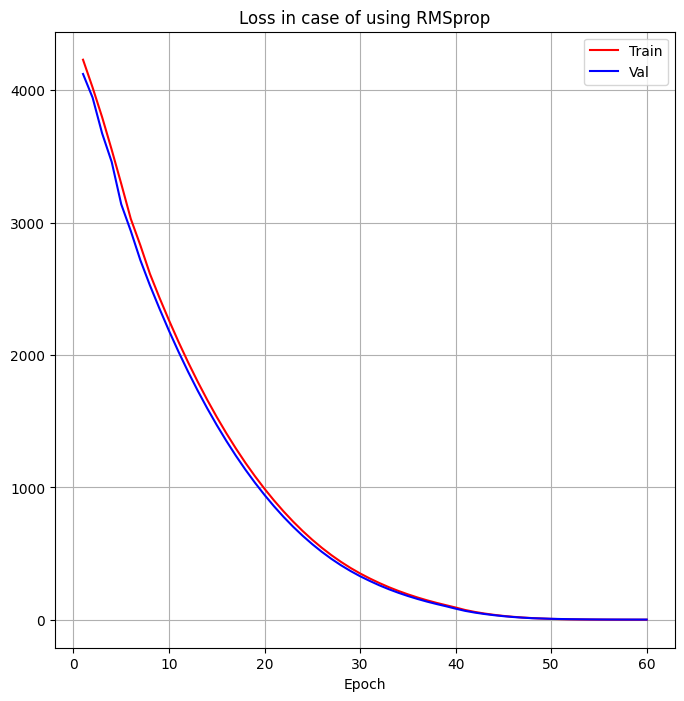

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-0,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3),loss=tf.keras.losses.MeanSquaredError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using RMSprop')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

# **MAE+learning rate 1e-3**

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 30)                3840      
                                                                 
 dense_36 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
170/170 [==============================] - 3s 7ms/step - loss: 55.4263 - val_loss: 54.1133
Epoch 2/100
170/170 [==============================] - 1s 4ms/step - loss: 51.6548 - val_loss: 49.5219
Epoch 3/100
170/170 [==============================] - 1s 5ms/step - loss: 45.3759 - val_loss: 42.2579
Epoch 4/100
170/170 [==============================] - 1s 5ms/step - loss: 40.4248 - val_loss: 39.1012
Epo

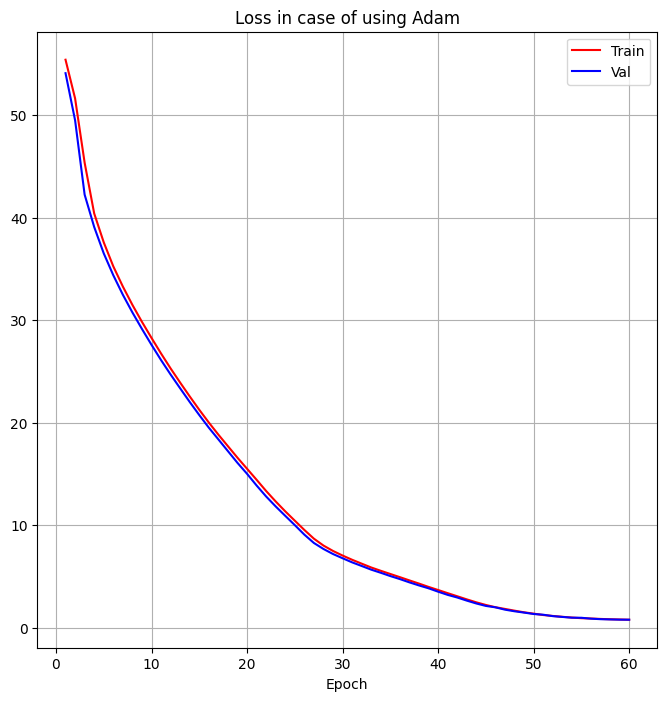

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-1,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss=tf.keras.losses.MeanAbsoluteError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using Adam')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_37 (LSTM)              (None, 30)                3840      
                                                                 
 dense_37 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
5413/5413 [==============================] - 23s 4ms/step - loss: 40.6132 - val_loss: 31.3732
Epoch 2/100
5413/5413 [==============================] - 21s 4ms/step - loss: 26.5851 - val_loss: 22.0677
Epoch 3/100
5413/5413 [==============================] - 21s 4ms/step - loss: 20.7910 - val_loss: 19.0656
Epoch 4/100
5413/5413 [==============================] - 21s 4ms/step - loss: 18.0114 - val_loss:

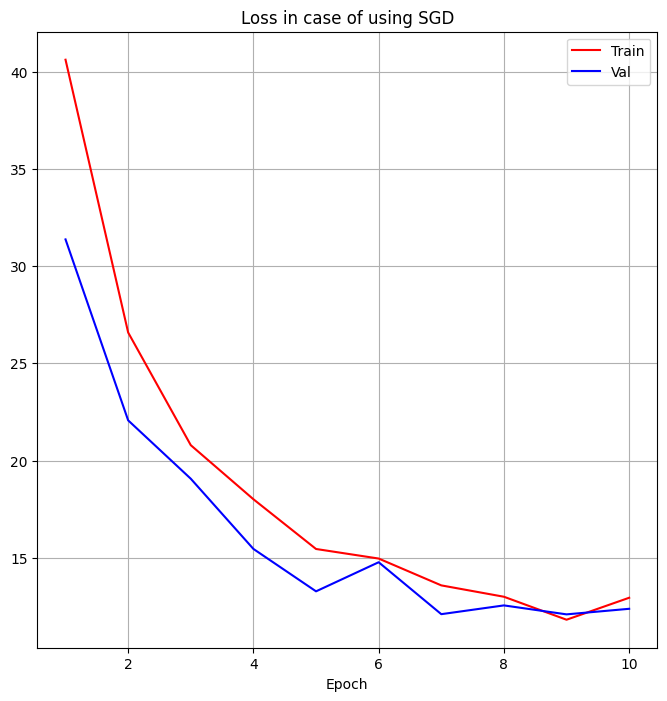

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-1,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),loss=tf.keras.losses.MeanAbsoluteError())
hist=model.fit(train_data_sgd,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using SGD')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_38 (LSTM)              (None, 30)                3840      
                                                                 
 dense_38 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
170/170 [==============================] - 3s 7ms/step - loss: 56.3265 - val_loss: 56.4481
Epoch 2/100
170/170 [==============================] - 1s 4ms/step - loss: 56.1594 - val_loss: 56.3066
Epoch 3/100
170/170 [==============================] - 1s 4ms/step - loss: 56.0164 - val_loss: 56.1569
Epoch 4/100
170/170 [==============================] - 1s 4ms/step - loss: 55.8654 - val_loss: 56.0117
Epo

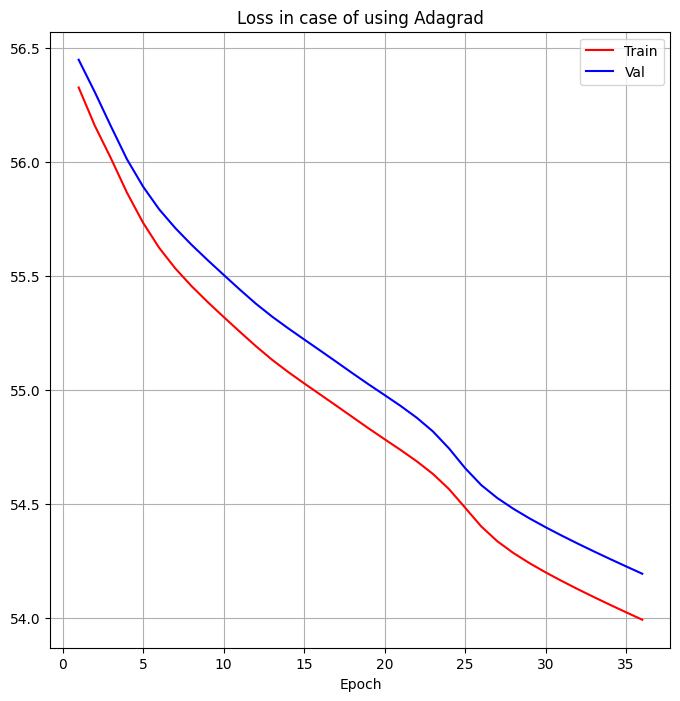

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-1,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=1e-3),loss=tf.keras.losses.MeanAbsoluteError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using Adagrad')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_39 (LSTM)              (None, 30)                3840      
                                                                 
 dense_39 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3871 (15.12 KB)
Trainable params: 3871 (15.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
170/170 [==============================] - 3s 7ms/step - loss: 55.5404 - val_loss: 54.9302
Epoch 2/100
170/170 [==============================] - 1s 4ms/step - loss: 53.9409 - val_loss: 53.3277
Epoch 3/100
170/170 [==============================] - 1s 4ms/step - loss: 52.2766 - val_loss: 51.6904
Epoch 4/100
170/170 [==============================] - 1s 4ms/step - loss: 50.6908 - val_loss: 50.1043
Epo

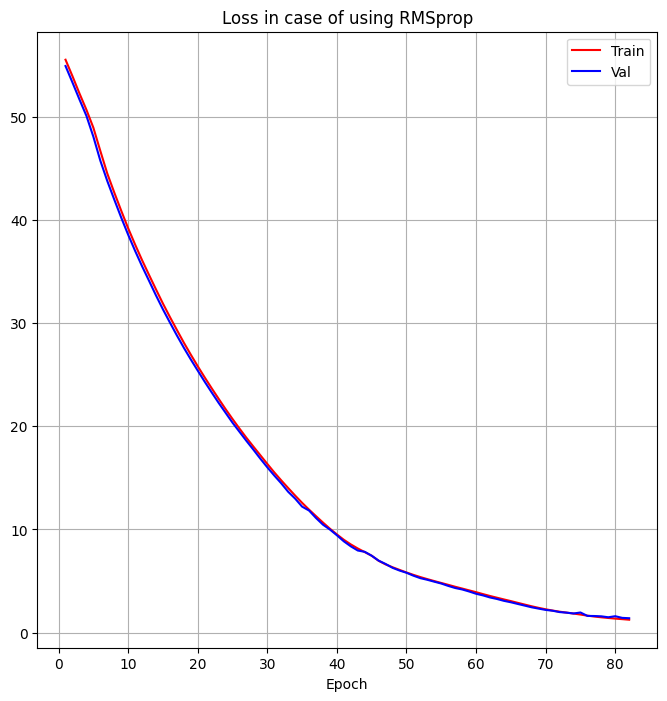

In [ ]:
model=tf.keras.Sequential([tf.keras.layers.Input(shape=(pred_wind,n_features)),
                           tf.keras.layers.LSTM(units=pred_wind,return_sequences=False,kernel_initializer='he_normal'),
                           tf.keras.layers.Dense(units=1,activation='linear',kernel_initializer='he_normal')])
model.summary()
es=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=1e-1,patience=3,mode='min')
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3),loss=tf.keras.losses.MeanAbsoluteError())
hist=model.fit(train_data,epochs=EPOCHS,validation_data=val_data,callbacks=[es])
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=[i for i in range(1,len(loss)+1)]
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_title('Loss in case of using RMSprop')
ax.plot(epochs,loss,color='r',label='Train')
ax.plot(epochs,val_loss,color='b',label='Val')
ax.set_xlabel('Epoch')
ax.grid()
ax.legend()
plt.show()